In [118]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [119]:
#讀取人口密度的資料
data1 = pd.read_csv('Pd.csv')
data1.head()

,Country Name,Country Code,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,阿鲁巴,ABW,310.061111,314.900000,319.305556,323.211111,326.566667,329.394444,330.677778,330.394444,...,567.288889,571.555556,575.522222,579.205556,582.633333,585.772222,588.677778,591.344444,592.138889,591.872222
1,NaN,AFE,9.207577,9.459187,9.719622,9.992443,10.276307,10.565442,10.864498,11.177568,...,37.219640,38.254520,39.316203,40.417928,41.520571,42.623255,43.769082,44.946930,46.150813,47.354183
2,阿富汗,AFG,13.477056,13.751356,14.040239,14.343888,14.665298,14.999535,15.347393,15.711911,...,46.711251,48.359028,50.160542,51.750915,53.104284,54.648541,56.248231,57.908252,59.752281,61.480554
3,NaN,AFW,10.978074,11.213633,11.459305,11.712711,11.975377,12.247555,12.526275,12.813873,...,41.654561,42.804993,43.982443,45.180225,46.405991,47.661860,48.934069,50.222984,51.536679,52.862913
4,安哥拉,AGO,4.364589,4.428812,4.491720,4.550573,4.601413,4.641890,4.674343,4.706989,...,20.203972,20.972970,21.760116,22.561740,23.385535,24.230872,25.085051,25.951382,26.813577,27.676084


In [120]:
#創建加拿大的資料集
tempset1 = data1[data1 ['Country Code'] == 'CAN']
tempset1

,Country Name,Country Code,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
35,加拿大,CAN,2.037903,2.07616,2.115198,2.155463,2.194836,2.236105,2.276705,2.313735,...,3.871939,3.913067,3.952605,3.982215,4.027564,4.076166,4.134149,4.193949,4.239226,4.349505


In [121]:
#創建新加坡的資料集
tempset2 = data1[data1 ['Country Code'] == 'SGP']
tempset2

,Country Name,Country Code,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
208,新加坡,SGP,2540.895522,2612.238806,2679.104478,2748.656716,2816.268657,2887.164179,2951.641791,3002.985075,...,7524.6983,7636.721358,7714.702398,7806.77292,7908.720733,7882.377809,7897.305322,7965.878492,7918.951253,7595.495822


In [122]:
Country = ['CANADA', 'SINGAPORE']

years = np.linspace(1961, 2021, 61)

#加拿大
Pd_country1 = data1.loc[35]

#新加坡
Pd_country2 = data1.loc[208]


alldata = {
    "CANADA": Pd_country1,
    "SINGAPORE": Pd_country2,
}

df = pd.DataFrame(alldata)
df = df.iloc[2:]
df

,CANADA,SINGAPORE
1961,2.037903,2540.895522
1962,2.07616,2612.238806
1963,2.115198,2679.104478
1964,2.155463,2748.656716
1965,2.194836,2816.268657
...,...,...
2017,4.076166,7882.377809
2018,4.134149,7897.305322
2019,4.193949,7965.878492
2020,4.239226,7918.951253


In [123]:
#讀取人均GDP的資料
data2 = pd.read_csv('GDP.csv')
data2.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,阿鲁巴,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26515.678080,26942.307980,28421.386490,28451.273740,29326.708060,30918.515220,31902.762580,24487.863570,29342.100730,NaN
1,NaN,AFE,161.638982,161.111657,170.538537,198.038919,178.019217,196.818756,207.945574,210.149894,...,1736.222507,1724.534381,1545.559084,1436.094404,1613.668488,1550.111762,1499.954437,1353.927527,1539.165543,1622.391720
2,阿富汗,AFG,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,143.103233,167.165675,...,651.987862,628.146804,592.476165,520.251955,530.149863,502.057099,500.522981,516.866797,363.674087,NaN
3,NaN,AFW,107.423775,112.503866,118.197351,122.774120,131.163760,137.809818,143.601581,128.049650,...,2153.766138,2247.857492,1880.750778,1646.972399,1588.581005,1732.816544,1810.538006,1686.997899,1765.965307,1790.348800
4,安哥拉,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1502.950754,1903.717405,2998.501158


In [124]:
#創建一個同時包含CANADA和SINGAPORE人均GDP的資料集
tempset3 = data2[(data2['Country Code'] == 'CAN') | (data2['Country Code'] == 'SGP')]
tempset3

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
35,加拿大,CAN,2259.288302,2240.442972,2268.580522,2374.484523,2555.133928,2770.358560,3047.036662,3217.152221,...,52635.17496,50955.99832,43596.13554,42315.60371,45129.42930,46547.79518,46374.15275,43349.67786,52358.62164,54966.48884
208,新加坡,SGP,428.056183,449.148137,472.082740,511.202235,485.530686,516.531928,566.803974,626.029437,...,56967.42579,57564.80231,55645.60686,56895.64334,61164.89736,66836.53851,66070.47067,61274.00646,77710.06996,82807.64908


In [125]:
Country = ['CANADA', 'SINGAPORE']

years = np.linspace(1960, 2022, 63)

#加拿大
GDP_country1 = data2.loc[35]

#新加坡
GDP_country2 = data2.loc[208]


alldata = {
    "CANADA": GDP_country1,
    "SINGAPORE": GDP_country2,
}

df2 = pd.DataFrame(alldata)
df2 = df2.iloc[2:]
df2

,CANADA,SINGAPORE
1960,2259.288302,428.056183
1961,2240.442972,449.148137
1962,2268.580522,472.08274
1963,2374.484523,511.202235
1964,2555.133928,485.530686
...,...,...
2018,46547.79518,66836.53851
2019,46374.15275,66070.47067
2020,43349.67786,61274.00646
2021,52358.62164,77710.06996


C:\Users\Jessica\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Jessica\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Jessica\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

Text(0, 0.5, 'Current US$')

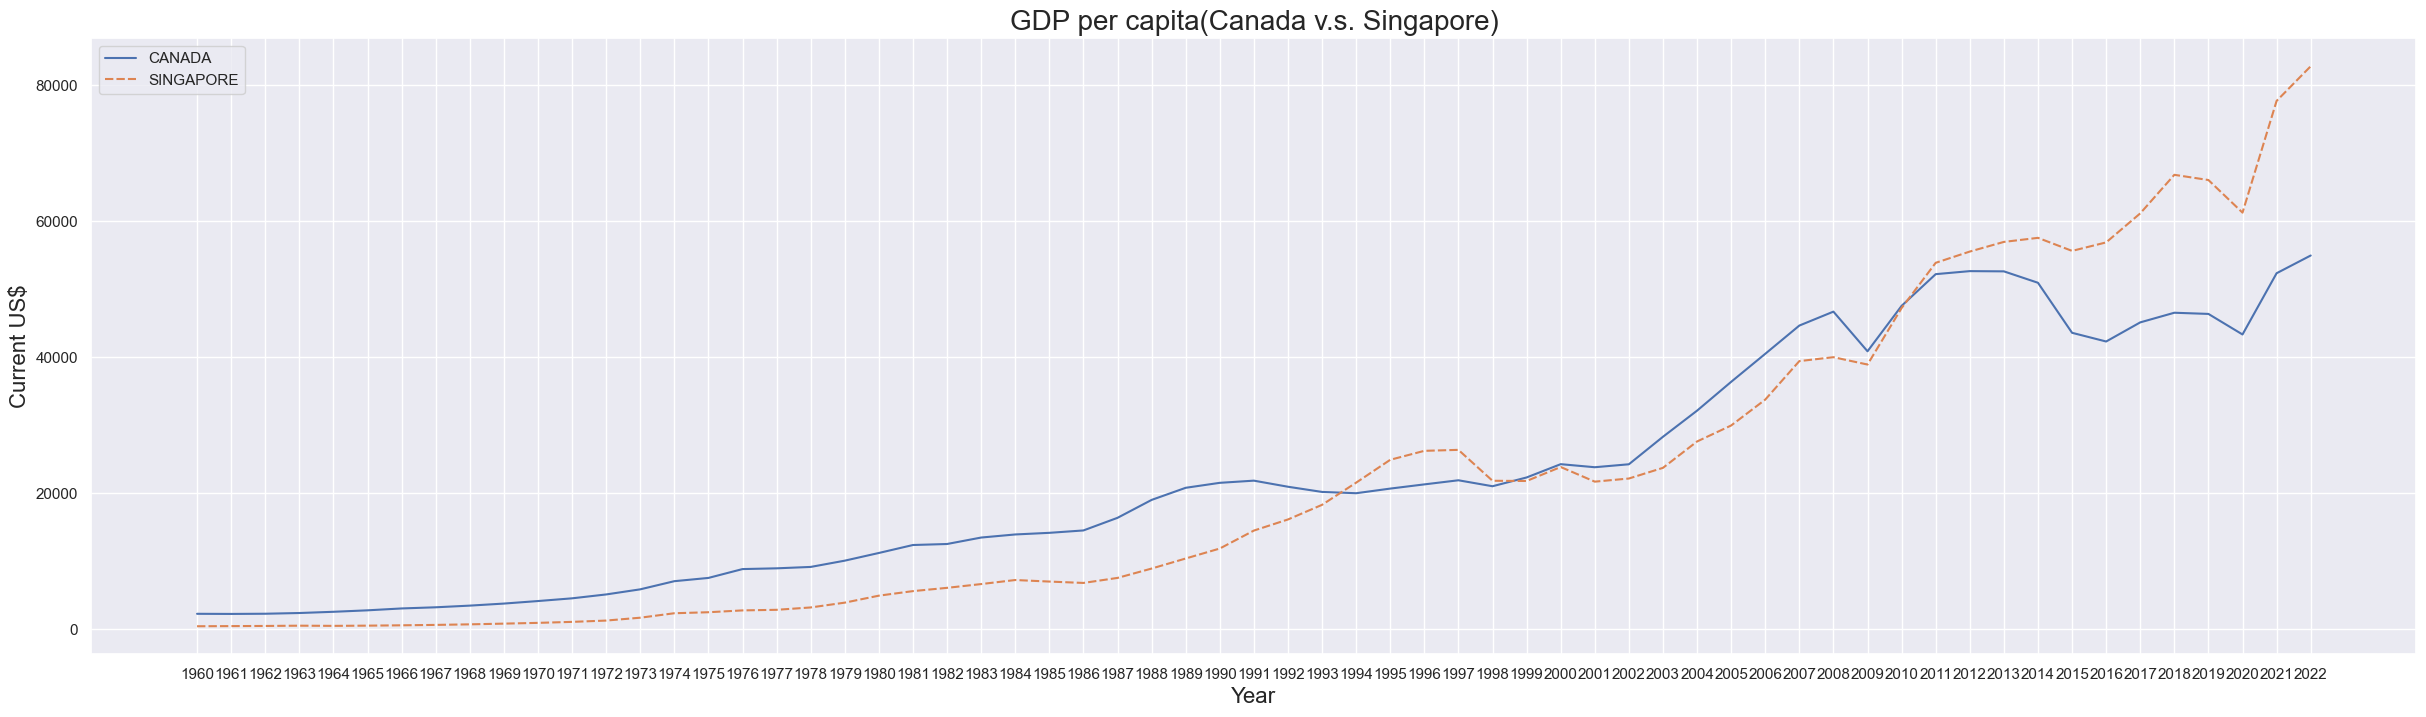

In [134]:
#人均GDP比較圖(加拿大V.S.新加坡)
sns.set(rc = {'figure.figsize':(30,8)})
g = sns.lineplot(data=df2)
plt.title('GDP per capita(Canada v.s. Singapore)', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Current US$', fontsize=16)